## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Defining path
path=r'C:\Users\dolson\OneDrive - BEACON TECHNOLOGIES\Desktop\Achievement6'

In [5]:
# Import boat data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boatclean6.2.csv'))

In [6]:
df.shape

(9241, 13)

In [7]:
df.head()

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Views last 7 days,EUR_Price,Country,City,PriceCategory
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,226,3337,Switzerland,Lake Geneva,Low-priced
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt,Low-priced
2,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,64,29266,Denmark,Svendborg,Low-priced
3,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern,Low-priced
4,6,Catamaran,Unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3600,Switzerland,Neuenburgersee,Low-priced


#### Data Cleaning

In [8]:
# Dropping the redundant columns
df1 = df.drop(['Unnamed: 0'],axis = 1)

In [9]:
# Remove categorial columns, keep numberical minus dates/years
df = df1[['Length','Width','Views last 7 days','EUR_Price']]

In [10]:
df.head()

,Length,Width,Views last 7 days,EUR_Price
0,4.00,1.90,226,3337
1,4.00,1.50,75,3490
2,3.00,1.00,64,29266
3,3.55,1.46,58,3399
4,6.20,2.38,474,3600


In [11]:
df.shape

(9241, 4)

### 2. Standardizing the data

In [12]:
# standazing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
print(standardized_data)

[[-1.28684193 -1.36365653  0.48713069 -0.31101089]
 [-1.28684193 -1.69372949 -0.48644485 -0.31085189]
 [-1.45359497 -2.10632068 -0.55736757 -0.28406453]
 ...
 [-1.22014071 -1.44617477  1.31241327 -0.3098033 ]
 [-1.2251433  -1.37190836  0.7450315  -0.31001011]
 [-1.35354314 -1.61121125  0.28081005 -0.31055051]]


In [13]:
# coverting to dataframe
df = pd.DataFrame(standardized_data, columns=df.columns)
print(df)

        Length     Width  Views last 7 days  EUR_Price
0    -1.286842 -1.363657           0.487131  -0.311011
1    -1.286842 -1.693729          -0.486445  -0.310852
2    -1.453595 -2.106321          -0.557368  -0.284065
3    -1.361881 -1.726737          -0.596053  -0.310946
4    -0.919985 -0.967569           2.086116  -0.310738
...        ...       ...                ...        ...
9236 -0.953336 -1.594708           0.886877  -0.309335
9237 -0.903310 -0.918058           6.225424  -0.309387
9238 -1.220141 -1.446175           1.312413  -0.309803
9239 -1.225143 -1.371908           0.745031  -0.310010
9240 -1.353543 -1.611211           0.280810  -0.310551

[9241 rows x 4 columns]


### 3. The elbow technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-36963.99999999998,
 -25362.504361518444,
 -19408.43411883179,
 -14973.457910464915,
 -11897.231857580296,
 -10302.282753987449,
 -8816.899343117884,
 -7979.126321533601,
 -7263.811049135214]

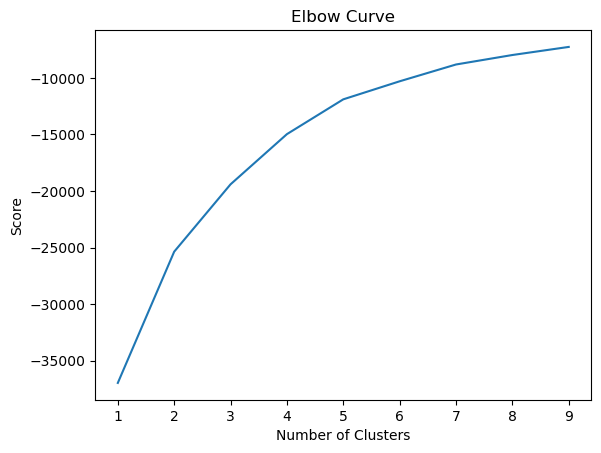

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  The elbow curve above shows a slight breaking point after 5, with line straigtening out.  Meaning that the optimal count for  clusters is five.

### 3. k-means clustering

In [17]:
# Create the k-means object.
 
kmeans = KMeans(n_clusters = 5) 

In [18]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=5)

In [19]:
# Create column to view clusters
df['clusters'] = kmeans.fit_predict(df)

In [20]:
df.head()

,Length,Width,Views last 7 days,EUR_Price,clusters
0,-1.286842,-1.363657,0.487131,-0.311011,0
1,-1.286842,-1.693729,-0.486445,-0.310852,0
2,-1.453595,-2.106321,-0.557368,-0.284065,0
3,-1.361881,-1.726737,-0.596053,-0.310946,0
4,-0.919985,-0.967569,2.086116,-0.310738,3


In [21]:
# Check how many observations fall into each cluster
df['clusters'].value_counts()

0    4444
1    3511
4     845
3     401
2      40
Name: clusters, dtype: int64

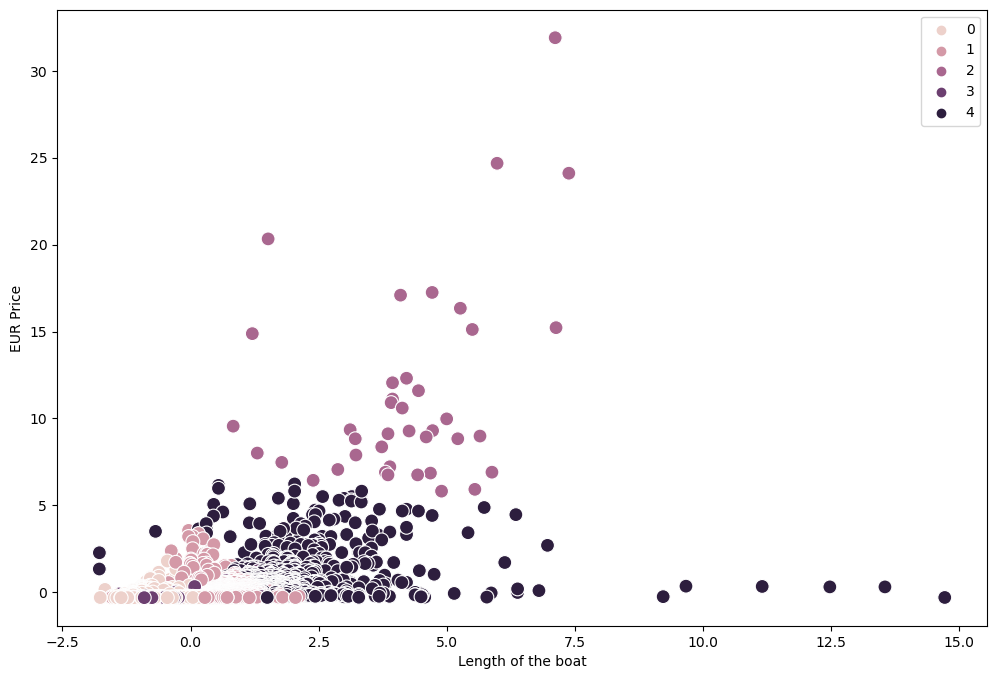

In [26]:
# Plot the clusters for EUR_Price and Length variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Length'], y=df['EUR_Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length of the boat') # Label x-axis.
plt.ylabel('EUR Price') # Label y-axis.
plt.show()
ax.figure.savefig("ClusterEURPriceLength")

In [27]:
# What is current directory saving to
cwd = os.getcwd()
cwd

'C:\\Users\\dolson\\OneDrive - BEACON TECHNOLOGIES\\Desktop\\Achievement6\\03 Scripts'

In [ ]:
# Plot the clusters for the "Views last 7 days" and "EUR_Price variables.

plt.figure(figsize=(12,8))
ax1 = sns.scatterplot(x=df['Views last 7 days'], y=df['EUR_Price'], hue=kmeans.labels_, s=100)

ax1.grid(False) 
plt2.xlabel('Views last 7 days') 
plt2.ylabel('EUR Price') 
plt2.show()
ax.figure.savefig("ClusterEURPrice")

Both graphs are not clear indicators of any correlation between boat cost, number of views and length of boat. Other variables would need to be taken into consideration when determinining the value of the boat (age, type, etc.)

In [35]:
df.loc[df['clusters'] == 4, 'cluster'] = 'black'
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [36]:
df.groupby('cluster').agg({'Length':['mean', 'median'], 
                         'Width':['mean', 'median'], 
                         'Views last 7 days':['mean', 'median'],
                          'EUR_Price':['mean', 'median']})

Length               Width           Views last 7 days  \
                 mean    median      mean    median              mean   
cluster                                                                 
black        2.075140  1.828105  1.906595  1.689518         -0.288655   
dark purple -0.545606 -0.669856 -0.597451 -0.794281          3.400863   
light pink  -0.653178 -0.669856 -0.736600 -0.794281         -0.022651   
pink         0.341985  0.288974  0.502417  0.501256         -0.295482   
purple       4.182699  4.174320  3.449220  3.273868          0.456666   

                       EUR_Price            
               median       mean    median  
cluster                                     
black       -0.415522   0.980122  0.584461  
dark purple  2.730868  -0.225894 -0.275196  
light pink  -0.157621  -0.237997 -0.263556  
pink        -0.396180  -0.038735 -0.118063  
purple       0.064818  11.400927  9.288064

In review of the relationships between coloumns there does not appear to be any strong relationships. The black cluster of variables(Length, Width,Views last 7 days, EUR_Price) has the highest mean/medium suggesting a positive correlation with these variables and EUR price. 

In [37]:
# Export the cluster df to prepared data folder 
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'clusterdf.csv'))